## Predict waist circumfrance in cm, w/ some DTI RSI measures

In [12]:
from ABCD_ML import ABCD_ML
import pandas as pd
import os

In [2]:
main_dr = '/home/sage/work/'

# Base data directories, 2.0 release with most of the phenotype information
nda_dr = main_dr + 'ABCD2p0NDA/'

# This folder contains the re-released 2.0.1 fixed MRI derived measurements
nda_dr2 = main_dr + 'ABCDFixRelease2p0p1/'

#This file stores the name mapping
map_file = os.path.join(nda_dr2, 'Fix Release Notes 2.0.1_Public', '24. ABCD_Release_2.0.1_Updates',
                        'abcd_2.0.1_mapping.csv')

# Target loc
target_loc = nda_dr + 'abcd_ant01.txt'

# Data loc
data_loc1 = nda_dr2 + 'mri_rsi_p102.txt'
data_loc2 = nda_dr2 + 'mri_rsi_p202.txt'

# Strat loc
strat1 = os.path.join(nda_dr, 'acspsw03.txt')

In [3]:
ML = ABCD_ML(exp_name = 'Waist_Circ',
             random_state = 1)

ML.Set_Default_Load_Params(dataset_type = 'basic',
                           eventname = 'baseline_year_1_arm_1')

exp_name = Waist_Circ
log_dr = /home/sage/ABCD_ML/Examples/Full_Examples
existing_log = append
verbose = True
exp log dr setup at: /home/sage/ABCD_ML/Examples/Full_Examples/Waist_Circ
log file at: /home/sage/ABCD_ML/Examples/Full_Examples/Waist_Circ/logs.txt
notebook = True
use_default_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1
ABCD_ML object initialized
Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: src_subject_id
eventname: baseline_year_1_arm_1
eventname_col: eventname
overlap_subjects: False
na_values: ['777', '999']
drop_na: True
drop_or_na: drop



## Load waist size + filter by some obvious outliers

cleared targets.

Loading /home/sage/work/ABCD2p0NDA/abcd_ant01.txt  with dataset type: basic
4951 subjects have been dropped based on passed eventname params.
Dropped 0 cols for all missing values
Dropped 17 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: anthro_waist_cm
Filtering for outliers by stds: (3, 4)
Min-Max Score (before outlier filtering): 0.0 90.0
Min-Max Score (post outlier filtering): 15.0 45.5

Dropped 50 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Final shape:  (11808, 1)

Total valid overlapping subjects = 11808

All loaded targets
0 : anthro_waist_cm

Set to overlapping loaded subjects.
-- anthro_waist_cm --


,anthro_waist_cm
count,11808.000000
mean,26.454045
std,4.199210
min,15.000000
25%,23.500000
50%,25.500000
75%,28.500000
max,45.500000


Num. of unique vals: 277



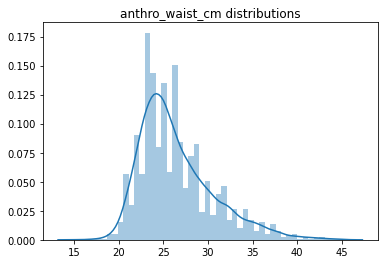

In [6]:
ML.Load_Targets(loc = target_loc,
                col_name = 'anthro_waist_cm',
                data_type = 'float',
                filter_outlier_std = (3,4),
                clear_existing = True)

ML.Show_Targets_Dist()

## Load RSI DTI data (just fiberrat, to keep # of features managable)

In [7]:
ML.Load_Data(loc = [data_loc1, data_loc2],
             inclusion_keys = ['_fiberat_'],
             filter_outlier_std = 6,
             clear_existing = True)

Cleared loaded data.

Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p102.txt  with dataset type: basic
dropped ['collection_id', 'mri_rsi_p102_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'dmri_rsi_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p202.txt  with dataset type: basic
dropped ['collection_id', 'mri_rsi_p202_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Keeping 294 columns per passed inclusion_keys argument
Dropped 0 cols for all missing values
Dropped 659 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Dropped 145 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...

Processing unique col values with drop threshold: 0 - warn thresh

In [8]:
ML.Show_Data_Dist()

Plotting data distribution.
Set to overlapping loaded subjects.
Viewing data with shape: (10539, 294)

Loaded data top columns by skew:
dmri_rsinds2_fiberat_fmin    -1.984486
dmri_rsinds2_fiberat_unclh   -1.705618
dmri_rsind_fiberat_fmin      -1.682619
dmri_rsint_fiberat_fmin      -1.672249
dmri_rsind_fiberat_unclh     -1.607202
                                ...   
dmri_rsints2_fiberat_cstlh    0.695660
dmri_rsints2_fiberat_unclh    0.801415
dmri_rsin0s2_fiberat_unclh    0.801769
dmri_rsin0s2_fiberat_fmin     0.976479
dmri_rsints2_fiberat_fmin     0.976839
Length: 294, dtype: float64



## Load Family ID & Sex as strat vars

In [9]:
ML.Load_Strat(loc=strat1,
              col_name='rel_family_id')

ML.Load_Strat(loc=data_loc1,
              col_name='sex')

Loading /home/sage/work/ABCD2p0NDA/acspsw03.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 2 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

Total valid overlapping subjects = 10537

Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p102.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Merged with existing!
New combined shape: (11397, 2)

Total valid overlapping subjects = 10537



## Define val strat on family id

In [10]:
ML.Define_Validation_Strategy(groups='rel_family_id')


Total valid overlapping subjects = 10537
Removing non overlapping subjects from loaded data, covars, ect...

CV defined with group preserving over 9000 unique values.


## Train Test Split

In [11]:
ML.Train_Test_Split(test_size = .2)

Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (10537, 297)
Performing split on 10537 subjects!
random_state: 1
Test split size: 0.2

Performed train test split
Train size: 8448
Test size:  2089


## Modelling

In [10]:
ML.Set_Default_ML_Params(problem_type = 'regression',
                         metric = ['r2', 'mae'],
                         scaler = 'robust',
                         splits = 3,
                         n_repeats = 1,
                         n_jobs = 12)

Default ML params set within self.default_ML_params.
----------------------
problem_type: regression
target: 0
model: linear
metric: ['r2', 'mae']
loader: None
loader_scope: data files
imputer: ['mean', 'median']
imputer_scope: ['float', 'cat']
scaler: robust
scaler_scope: float
transformer: None
transformer_scope: float
sampler: None
sample_on: targets
feat_selector: None
splits: 3
n_repeats: 1
weight_metric: False
search_splits: 3
ensemble: basic ensemble
ensemble_split: 0.2
search_type: None
model_params: 0
loader_params: 0
imputer_params: 0
scaler_params: 0
transformer_params: 0
sampler_params: 0
feat_selector_params: 0
ensemble_params: 0
n_jobs: 12
search_n_iter: 10
scope: all
subjects: all
compute_train_score: False
random_state: 1
feat_importances: base
feat_importances_params: 0
cache: None
extra_params: {}



imputer: ['mean', 'median']
imputer_scope: ['float', 'cat']

scaler,
transformer,
sampler,
feat_selector,
model,
ensemble

# Baseline w/ just linear model

In [19]:
results = ML.Evaluate(model = 'linear')

Running Evaluate with:
target = 0
problem_type = regression
model = linear
model_params = 0
metric = r2
weight_metric = False
scaler = standard
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 2
search_type = None
n_jobs = 8
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: linear1






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.23634341429310338
Macro Std in Validation score:  0.0010761506394288411
Micro Std in Validation score:  0.020236362064473823



In [20]:
results

{'summary_scores': [(0.23634341429310338,
   0.0010761506394288411,
   0.020236362064473823)],
 'raw_scores': [array([[0.20581998],
         [0.26837318],
         [0.23160863],
         [0.2412973 ],
         [0.25049782],
         [0.22046357]])],
 'raw_preds':                           1 1_fold  anthro_waist_cm          2 2_fold
 NDAR_INVPPEYYCZV  24.025257      1            25.00  23.534347      2
 NDAR_INVPTM61L43  27.148623      3            27.00  26.571418      2
 NDAR_INVGKUP6C90  24.571297      2            22.50  24.950033      3
 NDAR_INVG7GR26KK  28.005387      1            29.00  28.907260      2
 NDAR_INV3TABN96W  20.157211      2            28.00  20.097306      3
 ...                     ...    ...              ...        ...    ...
 NDAR_INVCJHJMM1A  24.877441      2            24.25  23.771864      1
 NDAR_INV9EYHTYJT  28.149737      1            24.00  27.844974      1
 NDAR_INV6MDP38L0  26.616418      3            26.00  26.342619      3
 NDAR_INVJ60R0EK4  28.91112

In [22]:
# Linear does bad as expected, lets try a ridge regression
results = ML.Evaluate(model = 'ridge')

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 0
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = None
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.2437685776020508
Std in Validation score:  0.02412619255312587

Metric:  neg mean absolute error
Mean Validation score:  -2.8203187814818076
Std in Validation score:  0.0428170439518399



In [23]:
# Let's see if turning the amt of regularization helps
results = ML.Evaluate(model = 'ridge',
                      model_params = 1,
                      search_type = 'DiscreteOnePlusOne',
                      search_n_iter = 50)

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = DiscreteOnePlusOne
search_splits = 3
search_n_iter = 50
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge0






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.24814263639384684
Std in Validation score:  0.026669780154873188

Metric:  neg mean absolute error
Mean Validation score:  -2.813539608361627
Std in Validation score:  0.04756522712848152



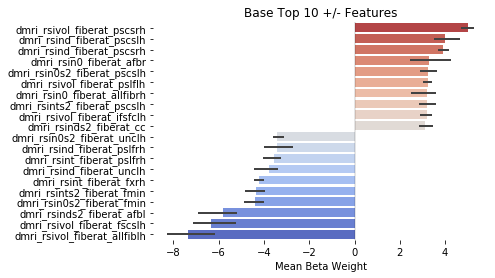

In [24]:
ML.Plot_Global_Feat_Importances()

## Let's try sex specific versions

In [25]:
results = ML.Evaluate(model = 'ridge',
                      subjects = ('sex', 0))

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 0
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = None
n_jobs = 12
scope = all
subjects = ('sex', 0)
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge1

subjects set to:  [('sex', 0)]






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.23483996999411497
Std in Validation score:  0.021115275682032638

Metric:  neg mean absolute error
Mean Validation score:  -2.878517130756162
Std in Validation score:  0.018809150994191576



In [26]:
results = ML.Evaluate(model = 'ridge',
                      subjects = ('sex', 1))

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 0
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = None
n_jobs = 12
scope = all
subjects = ('sex', 1)
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge2

subjects set to:  [('sex', 1)]






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.21085004192417345
Std in Validation score:  0.028135034220002412

Metric:  neg mean absolute error
Mean Validation score:  -2.8290404765750754
Std in Validation score:  0.04429192262556023



## Choice of initial scaler?

### Standard scaler

In [28]:
results = ML.Evaluate(model = 'ridge',
                      model_params = 1,
                      search_type = 'DiscreteOnePlusOne',
                      search_n_iter = 50,
                      scaler = 'standard')

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = standard
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = DiscreteOnePlusOne
search_splits = 3
search_n_iter = 50
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge4






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.24854537820798928
Std in Validation score:  0.026543027334231844

Metric:  neg mean absolute error
Mean Validation score:  -2.814368793920727
Std in Validation score:  0.046941857223555865



### Power transformer based scaler, either yeo or boxcox, since all our values are positive, we can use the faster boxcox, if we had any data points with negative values we would need to use yeo

In [35]:
results = ML.Evaluate(model = 'ridge',
                      model_params = 1,
                      search_type = 'DiscreteOnePlusOne',
                      search_n_iter = 50,
                      scaler = 'boxcox')

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = boxcox
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = DiscreteOnePlusOne
search_splits = 3
search_n_iter = 50
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge10






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.2507711155326428
Std in Validation score:  0.0201614482333436

Metric:  neg mean absolute error
Mean Validation score:  -2.813823789058024
Std in Validation score:  0.038793259510948905



### Let's stick with robust scaler, even though  boxcox gives boost, its a small one + increases runtime

## Try a different search_types / hyperparameter optimizers

In [38]:
results = ML.Evaluate(model = 'ridge',
                      model_params = 1,
                      search_type = 'RandomSearch',
                      search_n_iter = 60)

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = RandomSearch
search_splits = 3
search_n_iter = 60
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge12






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.24752870396984372
Std in Validation score:  0.027526764042663323

Metric:  neg mean absolute error
Mean Validation score:  -2.814552502769505
Std in Validation score:  0.04887530754862358



In [37]:
results = ML.Evaluate(model = 'ridge',
                      model_params = 1,
                      search_type = 'TwoPointsDE',
                      search_n_iter = 60)

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = TwoPointsDE
search_splits = 3
search_n_iter = 60
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge11






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.24767857409941038
Std in Validation score:  0.027626995527370538

Metric:  neg mean absolute error
Mean Validation score:  -2.8150005981587127
Std in Validation score:  0.048696082747060304



## We can try some other models as well

### Elastic net with param search, also switching to

In [44]:
results = ML.Evaluate(model = 'elastic net',
                      model_params = 1,
                      search_type = 'TwoPointsDE',
                      search_n_iter = 60)

Running Evaluate with:
target = 0
problem_type = regression
model = elastic net
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = TwoPointsDE
search_splits = 3
search_n_iter = 60
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: elastic net0



Objective did not converge. You might want to increase the number of iterations. Duality gap: 17988.55528349027, tolerance: 9.810266659514362
Objective did not converge. You might want to increase the number of iterations. Duality gap: 19560.95403829729, tolerance: 9.898184766061453
Objective did not converge. You might want to increase the number of iterations. Duality gap: 10244.293583950868, tolerance: 9.765240635615594





Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.2586439866363679
Std in Validation score:  0.023135392887829963

Metric:  neg mean absolute error
Mean Validation score:  -2.791666214485096
Std in Validation score:  0.042550727017611006



### Light gradient boosting machine with param search

In [43]:
results = ML.Evaluate(model = 'light gbm',
                      model_params = 1,
                      search_type = 'TwoPointsDE',
                      search_n_iter = 100)

Running Evaluate with:
target = 0
problem_type = regression
model = light gbm
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = TwoPointsDE
search_splits = 3
search_n_iter = 100
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: light gbm1






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.15066014217686555
Std in Validation score:  0.015233707840298278

Metric:  neg mean absolute error
Mean Validation score:  -2.996856016001295
Std in Validation score:  0.053119878858253484



### Non-linear svm (w/ rbf kernel) param search

In [60]:
results = ML.Evaluate(model = 'svm',
                      model_params = 1,
                      search_type = 'DiscreteOnePlusOne',
                      search_n_iter = 60)

Running Evaluate with:
target = 0
problem_type = regression
model = svm
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = DiscreteOnePlusOne
search_splits = 3
search_n_iter = 60
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: svm






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.21429910279077316
Std in Validation score:  0.016732444742913397

Metric:  neg mean absolute error
Mean Validation score:  -2.822153750927956
Std in Validation score:  0.04467238446404861



### Non-linear svm (w/ rbf kernel) param search + all features treated as hyperparams

In [11]:
results = ML.Evaluate(model = 'svm',
                      model_params = 1,
                      feat_selector = 'selector',
                      feat_selector_params = 1,
                      search_type = 'TwoPointsDE',
                      search_n_iter = 100)

Setting default ML verbosity settings!
Note, if the following values are not desired, call self.Set_Default_ML_Verbosity()
Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
show_init_params: True
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
save_to_logs: False

Running Evaluate with:
target = 0
problem_type = regression
model = svm
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = selector
feat_selector_params = 1
splits = 3
n_repeats = 1
search_type = TwoPointsDE
search_splits = 3
search_n_iter = 100
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: svm






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.20548451266994905
Std in Validation score:  0.01471521674818706

Metric:  neg mean absolute error
Mean Validation score:  -2.8422224525425683
Std in Validation score:  0.03968457495190614



### Same thing but w/ ridge regression

In [12]:
results = ML.Evaluate(model = 'ridge',
                      model_params = 1,
                      feat_selector = 'selector',
                      feat_selector_params = 1,
                      search_type = 'TwoPointsDE',
                      search_n_iter = 100)

Running Evaluate with:
target = 0
problem_type = regression
model = ridge
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = selector
feat_selector_params = 1
splits = 3
n_repeats = 1
search_type = TwoPointsDE
search_splits = 3
search_n_iter = 100
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: ridge






Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.2172931945673
Std in Validation score:  0.02347866917987026

Metric:  neg mean absolute error
Mean Validation score:  -2.8685373059030446
Std in Validation score:  0.04476325096484703



In [11]:
results = ML.Evaluate(model = 'mlp',
                      model_params = 1,
                      search_type = 'TwoPointsDE',
                      search_n_iter = 100)

Setting default ML verbosity settings!
Note, if the following values are not desired, call self.Set_Default_ML_Verbosity()
Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
show_init_params: True
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
save_to_logs: False

Running Evaluate with:
target = 0
problem_type = regression
model = mlp
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = TwoPointsDE
search_splits = 3
search_n_iter = 100
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: mlp



Stochastic Optimizer: Maximum iterations (315) reached and the optimization hasn't converged yet.





Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.21796720309383344
Std in Validation score:  0.004818468643814888

Metric:  neg mean absolute error
Mean Validation score:  -2.850997336852282
Std in Validation score:  0.023061096934201827



In [12]:
results = ML.Evaluate(model = 'elastic net',
                      model_params = 1,
                      search_type = 'TwoPointsDE',
                      search_n_iter = 60,
                      scaler = 'boxcox')

Running Evaluate with:
target = 0
problem_type = regression
model = elastic net
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = boxcox
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
splits = 3
n_repeats = 1
search_type = TwoPointsDE
search_splits = 3
search_n_iter = 60
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: elastic net



Objective did not converge. You might want to increase the number of iterations. Duality gap: 4793.194793616596, tolerance: 9.810266659514362
Objective did not converge. You might want to increase the number of iterations. Duality gap: 29744.47504044823, tolerance: 9.89818476606145
Objective did not converge. You might want to increase the number of iterations. Duality gap: 22884.98508740594, tolerance: 9.765240635615594





Validation Scores
_________________
Metric:  r2
Mean Validation score:  0.2560757075378776
Std in Validation score:  0.020538068276956332

Metric:  neg mean absolute error
Mean Validation score:  -2.7978061668520904
Std in Validation score:  0.04081658958083816



In [15]:
results = ML.Test(model = 'elastic net',
                  model_params = 1,
                  search_type = 'TwoPointsDE',
                  search_n_iter = 60)

Running Test with:
target = 0
problem_type = regression
model = elastic net
model_params = 1
metric = ['r2', 'mae']
weight_metric = False
scaler = robust
scaler_scope = float
scaler_params = 0
transformer = None
sampler = None
feat_selector = None
search_type = TwoPointsDE
search_splits = 3
search_n_iter = 60
n_jobs = 12
scope = all
subjects = all
compute_train_score = False
random_state = 1
feat_importances = base
feat_importances_params = 0
cache = None
extra_params = {}

Saving scores and settings with unique name: elastic net



Objective did not converge. You might want to increase the number of iterations. Duality gap: 31543.782956667736, tolerance: 14.737618033751211



Testing Scores
______________
Metric:  r2
Testing Score:  0.2583496263835393

Metric:  neg mean absolute error
Testing Score:  -2.678676461837367



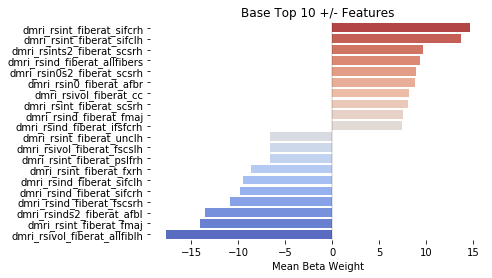

In [16]:
ML.Plot_Global_Feat_Importances()